# Stock Market Exploratory Data Analysis
## 1.Data Processing

Process the data adding any columns, isolating stock of interest, and dealing with Null values.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import mplfinance as mpf
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import random
alt.data_transformers.disable_max_rows()
warnings.filterwarnings('ignore')

stock_df = pd.read_csv('data/sp500_stocks.csv')
apple_stock = stock_df[stock_df['Symbol'] == 'AAPL']
amd_stock = pd.read_csv('data/amd_stock.csv')
amd_company = pd.read_csv('data/amd_company.csv')


In [97]:
def get_stock_data(stock_df):
    stock_df['MA_50'] = stock_df.groupby('Symbol')['Close'].rolling(window=50).mean().reset_index(level=0, drop=True)
    stock_df['MA_200'] = stock_df.groupby('Symbol')['Close'].rolling(window=200).mean().reset_index(level=0, drop=True)
    stock_df['std_50'] = stock_df.groupby('Symbol')['Close'].rolling(window=50).std().reset_index(level=0, drop=True)
    stock_df['std_200'] = stock_df.groupby('Symbol')['Close'].rolling(window=200).std().reset_index(level=0, drop=True)
    stock_df['Volatility'] = stock_df.groupby('Symbol')['Close'].pct_change().rolling(window=50).std()
    stock_df['upper_band_50'] = stock_df['MA_50'] + (stock_df['std_50'] * 2)
    stock_df['lower_band_50'] = stock_df['MA_50'] - (stock_df['std_50'] * 2)
    stock_df['upper_band_200'] = stock_df['MA_200'] + (stock_df['std_200'] * 2)
    stock_df['lower_band_200'] = stock_df['MA_200'] - (stock_df['std_200'] * 2)
    stock_df['Z-score'] = (stock_df['Close'] - stock_df['Close'].mean()) / stock_df['Close'].std()
    stock_df['Daily Return'] = stock_df.groupby('Symbol')['Close'].pct_change().reset_index(level=0, drop=True)
    # stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    # stock_df.set_index('Date', inplace=True)

get_stock_data(amd_stock)
print(amd_stock.iloc[50:61])

    index        Date Symbol  Adj Close  Close  High   Low  Open      Volume  \
50  22262  2010-03-17    AMD       9.67   9.67  9.74  9.42  9.47  23574800.0   
51  22263  2010-03-18    AMD       9.39   9.39  9.66  9.26  9.62  17772300.0   
52  22264  2010-03-19    AMD       9.11   9.11  9.41  9.10  9.11  15938000.0   
53  22265  2010-03-22    AMD       9.31   9.31  9.32  8.79  8.91  15101100.0   
54  22266  2010-03-23    AMD       9.45   9.45  9.49  9.26  9.34  10623200.0   
55  22267  2010-03-24    AMD       9.23   9.23  9.38  9.20  9.38  12096100.0   
56  22268  2010-03-25    AMD       9.03   9.03  9.44  9.02  9.35  15824100.0   
57  22269  2010-03-26    AMD       9.02   9.02  9.19  8.91  9.11  12158100.0   
58  22270  2010-03-29    AMD       9.11   9.11  9.20  9.06  9.08   9621900.0   
59  22271  2010-03-30    AMD       9.27   9.27  9.28  9.09  9.21  13451600.0   
60  22272  2010-03-31    AMD       9.27   9.27  9.44  9.13  9.15  12850100.0   

     MA_50  MA_200    std_50  std_200  

In [98]:
amd_stock

,index,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,MA_50,MA_200,std_50,std_200,Volatility,upper_band_50,lower_band_50,upper_band_200,lower_band_200,Z-score,Daily Return
0,22212,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.609422,NaN
1,22213,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.609212,0.001031
2,22214,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.612145,-0.014418
3,22215,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.614239,-0.010449
4,22216,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.615077,-0.004224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,25909,2024-09-12,AMD,150.770004,150.770004,151.539993,147.649994,148.429993,29286200.0,150.258000,159.11310,15.136525,19.145235,0.035363,180.531051,119.984950,197.403569,120.822630,2.345103,0.006072
3698,25910,2024-09-13,AMD,152.309998,152.309998,153.029999,150.699997,152.320007,25117200.0,150.026201,159.26140,15.011577,18.975492,0.035399,180.049355,120.003046,197.212383,121.310416,2.377357,0.010214
3699,25911,2024-09-16,AMD,152.080002,152.080002,154.440002,150.910004,151.699997,27677800.0,149.629801,159.41175,14.680213,18.797141,0.034666,178.990227,120.269375,197.006033,121.817467,2.372540,-0.001510
3700,25912,2024-09-17,AMD,150.820007,150.820007,154.039993,149.229996,153.550003,29889000.0,149.072401,159.54660,14.070747,18.636798,0.034158,177.213895,120.930906,196.820195,122.273004,2.346151,-0.008285


## 2 Data Exploration

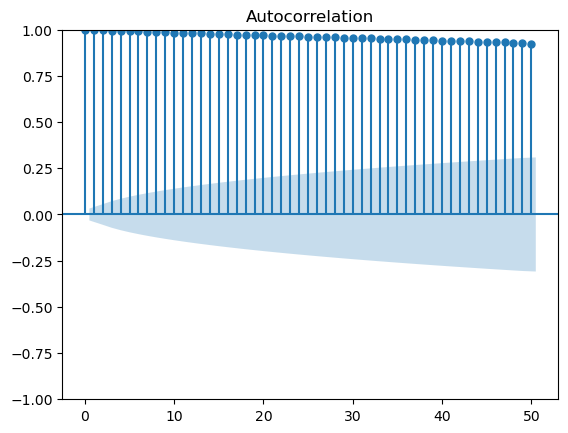

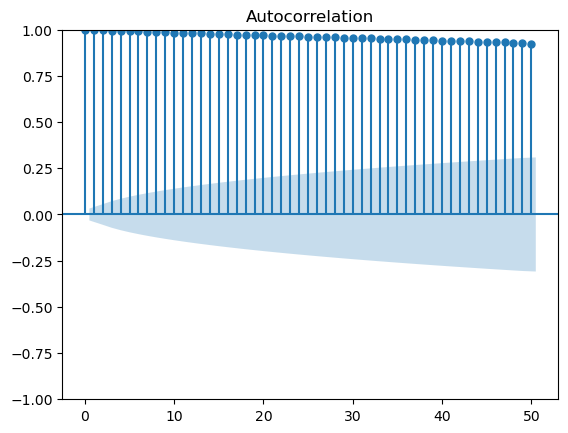

In [99]:
plot_acf(amd_stock['Close'], lags=50)

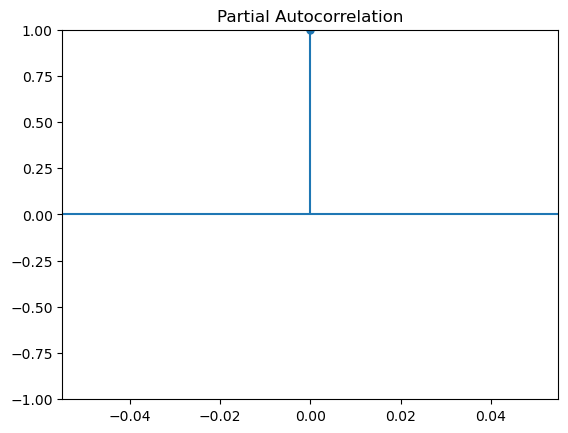

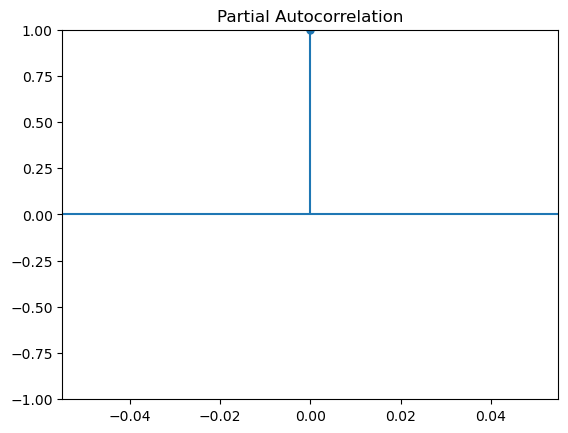

In [100]:
plot_pacf(amd_stock['Daily Return'], lags=200)

In [127]:
amd_stock

,index,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,MA_50,MA_200,std_50,std_200,Volatility,upper_band_50,lower_band_50,upper_band_200,lower_band_200,Z-score,Daily Return
0,22212,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.609422,NaN
1,22213,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.609212,0.001031
2,22214,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.612145,-0.014418
3,22215,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.614239,-0.010449
4,22216,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.615077,-0.004224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,25909,2024-09-12,AMD,150.770004,150.770004,151.539993,147.649994,148.429993,29286200.0,150.258000,159.11310,15.136525,19.145235,0.035363,180.531051,119.984950,197.403569,120.822630,2.345103,0.006072
3698,25910,2024-09-13,AMD,152.309998,152.309998,153.029999,150.699997,152.320007,25117200.0,150.026201,159.26140,15.011577,18.975492,0.035399,180.049355,120.003046,197.212383,121.310416,2.377357,0.010214
3699,25911,2024-09-16,AMD,152.080002,152.080002,154.440002,150.910004,151.699997,27677800.0,149.629801,159.41175,14.680213,18.797141,0.034666,178.990227,120.269375,197.006033,121.817467,2.372540,-0.001510
3700,25912,2024-09-17,AMD,150.820007,150.820007,154.039993,149.229996,153.550003,29889000.0,149.072401,159.54660,14.070747,18.636798,0.034158,177.213895,120.930906,196.820195,122.273004,2.346151,-0.008285


In [128]:
amd_company

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AMD,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Inc.",Technology,Semiconductors,148.29,240004382720,4.046000e+09,0.089,Santa Clara,CA,United States,26000.0,"Advanced Micro Devices, Inc. operates as a sem...",0.004599


In [101]:
amd_stock.describe()

,index,Adj Close,Close,High,Low,Open,Volume,MA_50,MA_200,std_50,std_200,Volatility,upper_band_50,lower_band_50,upper_band_200,lower_band_200,Z-score,Daily Return
count,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3.702000e+03,3653.000000,3503.000000,3653.000000,3503.000000,3652.000000,3653.000000,3653.000000,3503.000000,3503.000000,3.702000e+03,3701.000000
mean,24062.500000,38.798125,38.798125,39.587218,37.990462,38.809756,4.664060e+07,38.285288,36.267392,3.307969,6.605692,0.033688,44.901226,31.669350,49.478776,23.056008,6.141915e-17,0.001350
std,1068.819676,47.747096,47.747096,48.721260,46.760288,47.784564,3.527741e+07,46.874726,43.076002,4.411235,8.086364,0.010568,54.891656,39.205331,58.647337,28.190211,1.000000e+00,0.035280
min,22212.000000,1.620000,1.620000,1.690000,1.610000,1.620000,0.000000e+00,1.822800,2.115750,0.090577,0.255830,0.012292,2.003955,1.263422,2.700093,0.309725,-7.786468e-01,-0.242291
25%,23137.250000,4.202500,4.202500,4.292500,4.140000,4.200000,1.938130e+07,4.118400,3.923575,0.401436,0.870355,0.026560,4.783192,3.640789,6.445988,2.558830,-7.245598e-01,-0.016760
50%,24062.500000,11.230000,11.230000,11.460000,11.000000,11.250000,3.905245e+07,11.540600,11.930100,0.934116,1.990813,0.031844,13.554611,9.199584,15.059077,6.401047,-5.773781e-01,0.000000
75%,24987.750000,76.572502,76.572502,78.049997,74.947500,76.707502,6.303128e+07,75.700000,78.034450,4.847309,12.046689,0.038770,87.683629,59.206264,99.990893,46.644379,7.911345e-01,0.018620
max,25913.000000,211.380005,211.380005,227.300003,208.220001,213.410004,3.250584e+08,181.904399,159.682250,20.433733,32.554871,0.086118,212.514083,157.328139,208.211116,122.774592,3.614500e+00,0.522901


In [124]:
amd_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3702 non-null   int64  
 1   Date            3702 non-null   object 
 2   Symbol          3702 non-null   object 
 3   Adj Close       3702 non-null   float64
 4   Close           3702 non-null   float64
 5   High            3702 non-null   float64
 6   Low             3702 non-null   float64
 7   Open            3702 non-null   float64
 8   Volume          3702 non-null   float64
 9   MA_50           3653 non-null   float64
 10  MA_200          3503 non-null   float64
 11  std_50          3653 non-null   float64
 12  std_200         3503 non-null   float64
 13  Volatility      3652 non-null   float64
 14  upper_band_50   3653 non-null   float64
 15  lower_band_50   3653 non-null   float64
 16  upper_band_200  3503 non-null   float64
 17  lower_band_200  3503 non-null   f

In [126]:
amd_company

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AMD,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Inc.",Technology,Semiconductors,148.29,240004382720,4.046000e+09,0.089,Santa Clara,CA,United States,26000.0,"Advanced Micro Devices, Inc. operates as a sem...",0.004599


In [105]:
def plot_closing_price(df, company):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_line().encode(
        alt.X('Date:T', title='Date'),
        alt.Y('Close:Q', title='Closing Price'),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q'])
    ).properties(
        title=f'{company} Closing Price',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
amd_stock_2021 = amd_stock[(amd_stock['Date'] >= '2021-01-01') & (amd_stock['Date'] <= '2022-01-01')]


In [109]:
plot_closing_price(amd_stock_2021, 'AMD')


alt.Chart(...)

In [129]:
def plot_volume(df, company):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_line().encode(
        alt.X('Date:T', title='Date'),
        alt.Y('Volume:Q', title='Volume'),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q'], format='.2f')
    ).properties(
        title=f'{company} Volume',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
plot_volume(amd_stock_2021, 'AMD')

alt.Chart(...)

In [131]:
def plot_moving_average(df, company):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_line().encode(
        alt.X('Date:T', title='Date'),
        alt.Y('MA_50:Q', title='MA_50'),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q'], format='.2f')
    ).properties(
        title=f'{company} Moving Average',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
plot_moving_average(amd_stock_2021, 'AMD')

alt.Chart(...)

In [132]:
def plot_candlestick(df, company,window:list = None):
    filtered_df = df[df['Symbol'] == company]
    filtered_df = filtered_df[filtered_df['Date'] >= window[0]]
    filtered_df = filtered_df[filtered_df['Date'] <= window[1]]
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
    df = filtered_df
    candlestick = go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Candlestick'
        )
    
    volume = go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='blue',
        opacity=0.5,
        yaxis='y2'
    )

    layout = go.Layout(
        title= f'{company} Candlestick Chart',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price', showgrid=True),
        yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
        xaxis_rangeslider_visible=False,
        hovermode='x unified',
        plot_bgcolor='white'
    )

    fig = go.Figure(
        data=[candlestick, volume],
        layout=layout
        )
    fig.show()
plot_candlestick(amd_stock, 'AMD', window=['2021-01-01', '2022-01-01'])

In [133]:
def plot_daily_return(df, company):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_bar().encode(
        alt.X('Date:T', title='Date'),
        alt.Y('Daily Return:Q', title='Daily Return'),
        alt.Color('Daily Return:Q', scale=alt.Scale(scheme='redblue')),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q', 'Daily Return:Q'], format='.2f')
    ).properties(
        title=f'{company} Daily Return',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
plot_daily_return(amd_stock_2021, 'AMD')

alt.Chart(...)

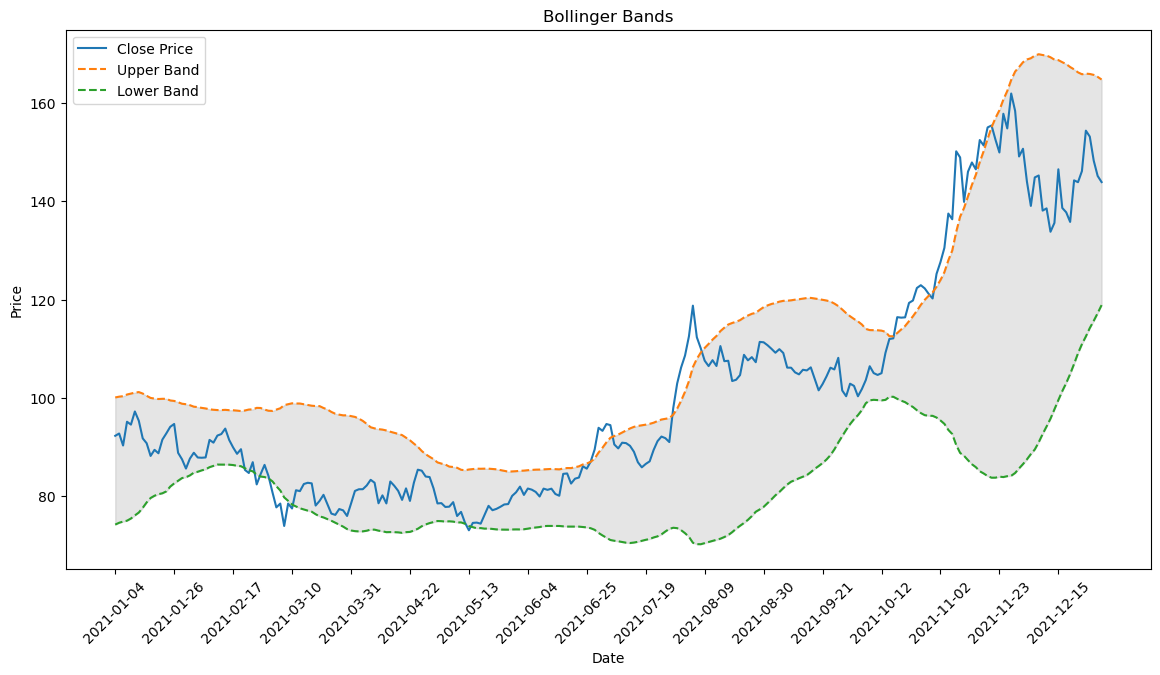

In [147]:

def plot_bollinger_bands(df, company):
    df = df[df['Symbol'] == company]
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['upper_band_50'], label='Upper Band', linestyle='--')
    plt.plot(df['Date'], df['lower_band_50'], label='Lower Band', linestyle='--')
    plt.fill_between(df['Date'], df['upper_band_50'], df['lower_band_50'], color='gray', alpha=0.2)
    plt.xlabel('Date')
    xticks = df['Date'][::15]
    plt.xticks(xticks, rotation=45)
    plt.ylabel('Price')
    plt.title('Bollinger Bands')
    plt.legend()
    plt.show()
plot_bollinger_bands(amd_stock_2021, 'AMD')

In [136]:

def plot_Z_score(df, company):
    filtered_df = df[df['Symbol'] == company]
    chart = alt.Chart(filtered_df).mark_line().encode(
        alt.X('Date:T', title='Date'),
        alt.Y('Z-score:Q', title='Z-score'),
        alt.Tooltip(['Date:T', 'Close:Q', 'Volume:Q', 'Z-score:Q'], format='.2f')
    ).properties(
        title=f'{company} Z-score',
        width=800,
        height=400
    ).interactive(
        bind_y=False
    )
    return chart
plot_Z_score(amd_stock_2021, 'AMD')

alt.Chart(...)

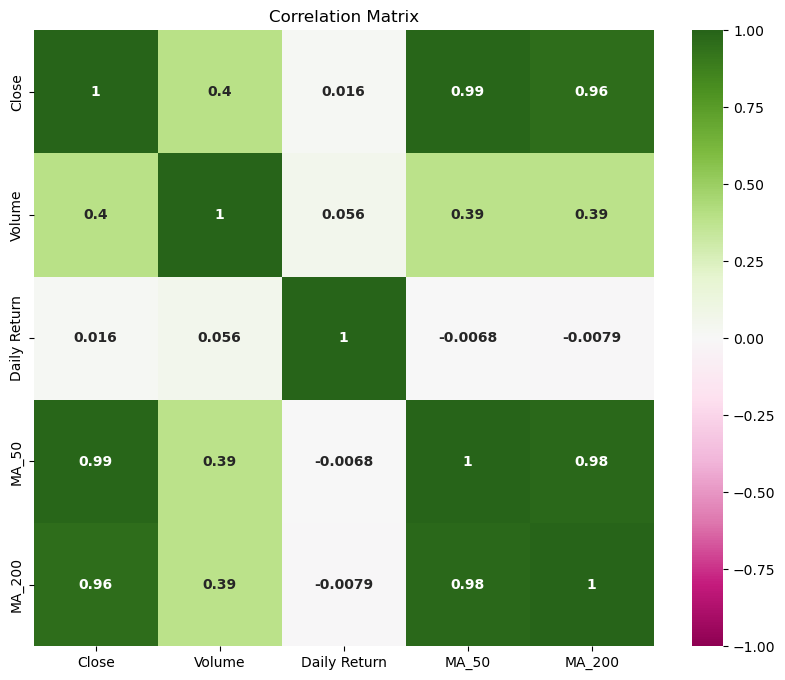

In [138]:

def plot_correlation_matrix(df, company):
    columns_of_interest = ['Close', 'Volume', 'Daily Return', 'MA_50', 'MA_200']
    correlation_matrix = df[columns_of_interest].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='PiYG', 
        vmin=-1, 
        vmax=1, 
        annot_kws={"size": 10, "weight": "bold"}  
        )
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(amd_stock, 'AMD')